<a href="https://colab.research.google.com/github/pakornsrs/DataSci-miniProjects/blob/main/CKD_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chronic Kidney Disease Analysis

คำอธิบาย : โปรเจ็คนี้เป็นการวิเคราะห์หาปัจจัยที่บ่งชี้ถึงผู้ป่วยที่มีสภาวะโรคไตเรื้อรัง หรือ Chronic Kidney Disease : CKD 

Reference data : https://www.kaggle.com/mansoordaku/ckdisease

### Library and file preparation

In [ ]:
import numpy as np
import pandas as pd 
from google.colab import files
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
# Upload data from local storage to google Colab
files.upload()

Saving kidney_disease.csv to kidney_disease.csv


{'kidney_disease.csv': b'id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification\n0,48.0,80.0,1.02,1.0,0.0,,normal,notpresent,notpresent,121.0,36.0,1.2,,,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd\n1,7.0,50.0,1.02,4.0,0.0,,normal,notpresent,notpresent,,18.0,0.8,,,11.3,38,6000,,no,no,no,good,no,no,ckd\n2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,,,9.6,31,7500,,no,yes,no,poor,no,yes,ckd\n3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd\n4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,,,11.6,35,7300,4.6,no,no,no,good,no,no,ckd\n5,60.0,90.0,1.015,3.0,0.0,,,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd\n6,68.0,70.0,1.01,0.0,0.0,,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,,,no,no,no,good,no,no,ckd\n7,24.0,,1.015,2.0,4.0,normal,abnormal,notpre

In [ ]:
# คำสั่งอ่านค่าไฟล์ CSV ที่ได้ทำการ upload ขึ้นระบบ
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


หมายเหตุ : NaN ในตารางคือช่องที่ไม่มีข้อมูล

reference : [kaggle.com/database](https://www.kaggle.com/mansoordaku/ckdisease)

**คำอธิบาย features :** 
*   age - age
*   bp - blood pressure
*   sg - specific gravity
*   al - albumin
*   su - sugar
*   rbc - red blood cells
*   pc - pus cell
*   pcc - pus cell clumps
*   ba - bacteria
*   bgr - blood glucose random
*   bu - blood urea
*   sc - serum creatinine
*   sod - sodium
*   pot - potassium
*   hemo - hemoglobin
*   pcv - packed cell volume
*   wc - white blood cell count
*   rc - red blood cell count
*   htn - hypertension
*   dm - diabetes mellitus
*   cad - coronary artery disease
*   appet - appetite
*   pe - pedal edema
*   ane - anemia

In [ ]:
# แสดงจำนวนข้อมูลทั้งหมด
len(df)

400

### Data processing
ในส่วนนี้จะเป็นการเตรียมข้อมูลให้พร้อมสำหรับการนำไปวิเคราะห์ เช่น เราจะทำการแปลงข้อมูลที่เป็นตัวอักษรให้เป็นตัวเลข เป็นต้น

In [ ]:
# แปลงคำว่า normal, abnormal ในตารางเป็นค่า 0 และ 1
df = df.replace(to_replace ="normal", value =0)
df = df.replace(to_replace ="abnormal", value =1)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
# แปลงคำว่า notpresent, present ในตารางเป็นค่า 0 และ 1
df = df.replace(to_replace ="notpresent", value =0)
df = df.replace(to_replace ="present", value =1)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
# แปลงคำว่า no, yes ในตารางเป็นค่า 0 และ 1
df = df.replace(to_replace ="no", value =0)
df = df.replace(to_replace ="\tno", value =1)
df = df.replace(to_replace ="yes", value =1)
df = df.replace(to_replace ="\tyes", value =1)
df = df.replace(to_replace =" yes", value =1)

df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1.0,1.0,0.0,good,0.0,0.0,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0.0,0.0,0.0,good,0.0,0.0,ckd
2,2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0.0,1.0,0.0,poor,0.0,1.0,ckd
3,3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,poor,1.0,1.0,ckd
4,4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,0.0,0.0,0.0,good,0.0,0.0,ckd


In [ ]:
# แปลงคำว่า good, poor ในตารางเป็นค่า 0 และ 1
df = df.replace(to_replace ="good", value =0)
df = df.replace(to_replace ="poor", value =1)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1.0,1.0,0.0,0.0,0.0,0.0,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,ckd
2,2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0.0,1.0,0.0,1.0,0.0,1.0,ckd
3,3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,1.0,1.0,1.0,ckd
4,4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,0.0,0.0,0.0,0.0,0.0,0.0,ckd


In [ ]:
# แปลงคำว่า nonckd, ckd ในตารางเป็นค่า 0 และ 1
df = df.replace(to_replace ="notckd", value =0)
df = df.replace(to_replace ="ckd", value =1)
df = df.replace(to_replace ="ckd\t", value =1)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1.0,1.0,0.0,0.0,0.0,0.0,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0.0,1.0,0.0,1.0,0.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,1.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
# ทำการลบ column ที่เป็น id ของผู้ป่วยออกจาก data frame
df = df.drop(columns=['id'])
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1.0,1.0,0.0,0.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0.0,1.0,0.0,1.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,1.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
# ทำการแยก Data frame ส่วนของผู้ป่วย ckd ออกจาก data ทั้งหมด
df_ckd = df[df['classification'] != 0]

# ทำการลบ row ทั้งหมดที่มีค่าเป็น NaN ออกจาก data frame
# df_ckd = df_ckd.dropna()

df_ckd.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1.0,1.0,0.0,0.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0.0,1.0,0.0,1.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,1.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
# ทำการแยก Data frame ส่วนของ nonckd ออกจาก data ทั้งหมด
df_nonckd = df[df['classification'] != 1]

# ทำการลบ row ทั้งหมดที่มีค่าเป็น NaN ออกจาก data frame
# df_nonckd = df_nonckd.dropna()

df_nonckd.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
250,40.0,80.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,140.0,10.0,1.2,135.0,5.0,15.0,48,10400,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0
251,23.0,80.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,70.0,36.0,1.0,150.0,4.6,17.0,52,9800,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0
252,45.0,80.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,82.0,49.0,0.6,147.0,4.4,15.9,46,9100,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0
253,57.0,80.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,119.0,17.0,1.2,135.0,4.7,15.4,42,6200,6.2,0.0,0.0,0.0,0.0,0.0,0.0,0
254,51.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,99.0,38.0,0.8,135.0,3.7,13.0,49,8300,5.2,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
# แสดงจำนวน
print("จำนวนผู้ป่วย ckd = "+ str(len(df_ckd))+ " คน")
print("จำนวน nonckd = "+ str(len(df_nonckd))+ " คน")

จำนวนผู้ป่วย ckd = 250 คน
จำนวน nonckd = 150 คน


### Correlation coefficient analysis

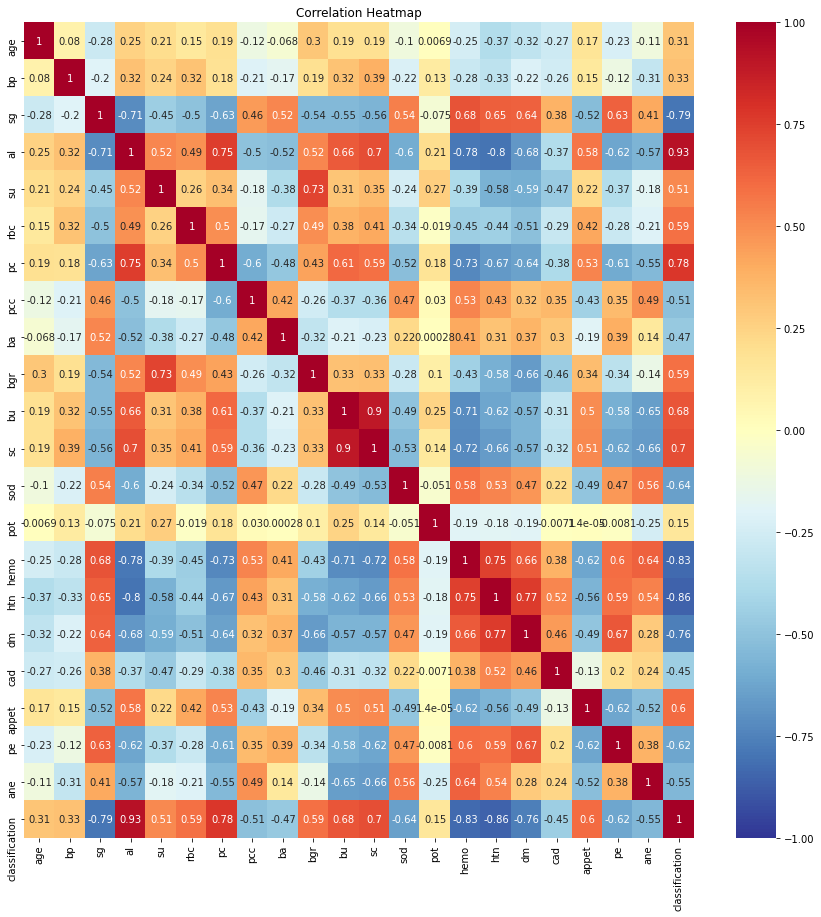

In [ ]:
# คำนวณ Correlation ของ features ทั้งหมด
correlations = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(correlations_,cmap = plt.cm.RdYlBu_r, vmin = -1, annot = True, vmax = 1)
plt.title('Correlation Heatmap');

**Correlation coefficient (r) หรือ ค่าสัมประสิทธิ์สหสัมพันธ์** คือ ตัวบ่งชี้ถึงความสัมพันธ์ของข้อมูลซึ่งค่าสัมประสิทธิ์สหสัมพันธ์นี้จะมีค่าอยู่ระหว่าง -1.0 ถึง +1.0 ซึ่งหากมีค่าใกล้ -1.0 นั้นหมายความว่าตัวแปรทั้งสองตัวมีความสัมพันธ์กันอย่างมากในเชิงตรงกันข้าม หากมีค่าใกล้ +1.0 นั้นหมายความว่า ตัวแปรทั้งสองมีความสัมพันธ์กันโดยตรงอย่างมาก และหากมีค่าเป็น 0 นั้นหมายความว่า ตัวแปรทั้งสองตัวไม่มีความสัมพันธ์ต่อกัน [1]

[1] [reference](https://medium.com/@info_46914/%E0%B8%AA%E0%B8%96%E0%B8%B4%E0%B8%95%E0%B8%B4%E0%B9%80%E0%B8%9A%E0%B8%B7%E0%B9%89%E0%B8%AD%E0%B8%87%E0%B8%95%E0%B9%89%E0%B8%99%E0%B8%87%E0%B9%88%E0%B8%B2%E0%B8%A2%E0%B9%86-%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B8%88%E0%B8%B0%E0%B8%97%E0%B8%B3%E0%B9%83%E0%B8%AB%E0%B9%89%E0%B8%84%E0%B8%B8%E0%B8%93%E0%B9%80%E0%B8%82%E0%B9%89%E0%B8%B2%E0%B9%83%E0%B8%88%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%A7%E0%B8%B4%E0%B9%80%E0%B8%84%E0%B8%A3%E0%B8%B2%E0%B8%B0%E0%B8%AB%E0%B9%8C%E0%B8%A1%E0%B8%B2%E0%B8%81%E0%B8%82%E0%B8%B6%E0%B9%89%E0%B8%99-%E0%B8%95%E0%B8%AD%E0%B8%99%E0%B8%97%E0%B8%B5%E0%B9%88-2-1f94b6664ede)

ในกรณีนี้เราจะสนใจแค่ Correlation coefficient ระหว่าง features ต่างๆ กับ Classification เท่านั้น **หรือพูดอีกแบบหนึ่งก็คือ ค่าดังกล่าวจะเป็นค่าที่บ่งชี้ถึงความเกี่ยวข้องระหว่าง features ต่างๆ กับภาวะโรคไตเรื้อรัง (ckd)**

*   เราจะเห็นค่า Correlation coefficient ระหว่าง al-albumin กับ classification เป็น 0.93 สามารถอนุมานได้ว่า ผู้ป่วยที่มีค่า albumin ในปัสสาวะสูง มีแนวโน้มที่จะเป็นโรคไตเรื้อรัง (ckd)
*   เราจะเห็นค่า Correlation coefficient ระหว่าง sg-specific gravity กับ classification เป็น -0.79 สามารถอนุมานได้ว่า ผู้ป่วยที่มีค่า specific gravity ในปัสสาวะต่ำ มีแนวโน้มที่จะเป็นโรคไตเรื้อรัง (ckd) 



**ในส่วนนี้จะนำ Features ที่มีค่า |Correlation| > 0.7 ไปทำการวิเคราะห์ต่อ**

### Data analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'nonCKD')]

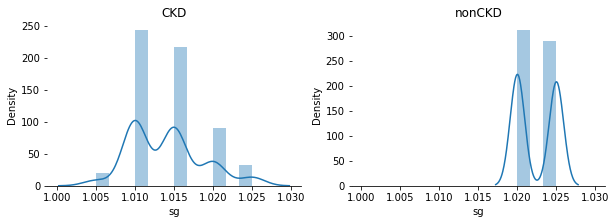

In [ ]:
# เปรียบเทียบค่า Specific gravity (sg) ในปัสสาวะ ของผู้ป่วย ckd และ nonckd

f, axes = plt.subplots(1, 2,figsize=(10,3),sharex=True)
sns.despine(left=True)

sns.distplot(df_ckd['sg'],ax=axes[0]).set(title='CKD')
sns.distplot(df_nonckd['sg'],ax=axes[1]).set(title='nonCKD')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


[Text(0.5, 1.0, 'nonCKD')]

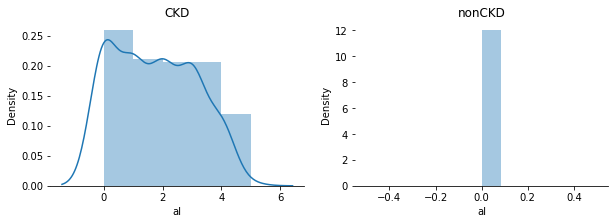

In [ ]:
# เปรียบเทียบค่า Albumin (al) ในปัสสาวะ ของผู้ป่วย ckd และ nonckd

f, axes = plt.subplots(1, 2,figsize=(10,3))
sns.despine(left=True)

sns.distplot(df_ckd['al'],ax=axes[0]).set(title='CKD')
sns.distplot(df_nonckd['al'],ax=axes[1]).set(title='nonCKD')

ผู้ป่วย ckd มีแนวโน้มที่จะมีค่า Albumin > 0 




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


[Text(0.5, 1.0, 'nonCKD')]

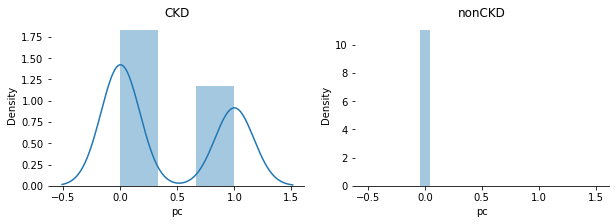

In [ ]:
# เปรียบเทียบค่า Pus cell (pc) ของผู้ป่วย ckd และ nonckd
f, axes = plt.subplots(1, 2,figsize=(10,3),sharex=True)
sns.despine(left=True)

sns.distplot(df_ckd['pc'],ax=axes[0]).set(title='CKD')
sns.distplot(df_nonckd['pc'],ax=axes[1]).set(title='nonCKD')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'nonCKD')]

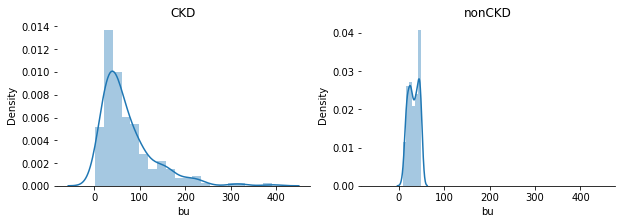

In [ ]:
# เปรียบเทียบค่า blood urea (bu) ของผู้ป่วย ckd และ nonckd

f, axes = plt.subplots(1, 2,figsize=(10,3),sharex=True)
sns.despine(left=True)

sns.distplot(df_ckd['bu'],ax=axes[0]).set(title='CKD')
sns.distplot(df_nonckd['bu'],ax=axes[1]).set(title='nonCKD')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'nonCKD')]

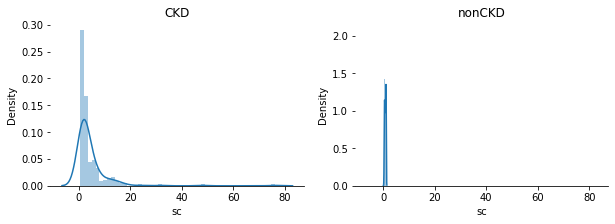

In [ ]:
# เปรียบเทียบค่า serum creatinine (sc) ของผู้ป่วย ckd และ nonckd

f, axes = plt.subplots(1, 2,figsize=(10,3),sharex=True)
sns.despine(left=True)

sns.distplot(df_ckd['sc'],ax=axes[0]).set(title='CKD')
sns.distplot(df_nonckd['sc'],ax=axes[1]).set(title='nonCKD')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'nonCKD')]

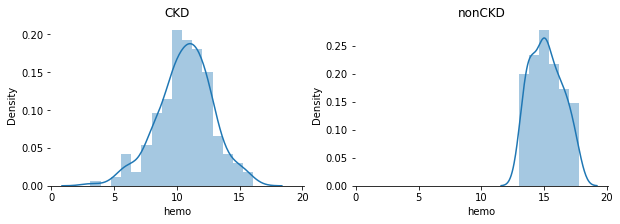

In [ ]:
# เปรียบเทียบค่า hemoglobin (hemo) ในเลือด ของผู้ป่วย ckd และ nonckd

f, axes = plt.subplots(1, 2,figsize=(10,3),sharex=True)
sns.despine(left=True)

sns.distplot(df_ckd['hemo'],ax=axes[0]).set(title='CKD')
sns.distplot(df_nonckd['hemo'],ax=axes[1]).set(title='nonCKD')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


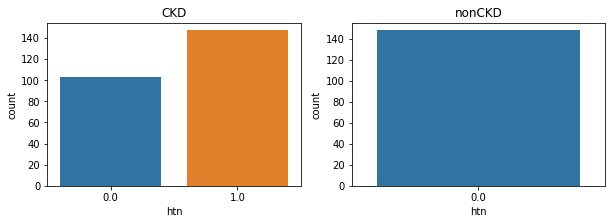

In [ ]:
# เปรียบเทียบค่า hypertension (htn, ภาวะโรคความดันโลหิตสูง) ของผู้ป่วย ckd และ nonckd

fig, ax = plt.subplots(1,2,figsize=(10,3))
sns.countplot(df_ckd['htn'], ax=ax[0]).set(title='CKD')
sns.countplot(df_nonckd['htn'], ax=ax[1]).set(title='nonCKD')
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


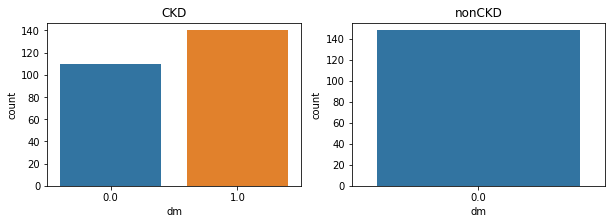

In [ ]:
# เปรียบเทียบค่า  diabetes mellitus (dm, ภาวะโรคเบาหวาน) ของผู้ป่วย ckd และ nonckd

fig, ax = plt.subplots(1,2,figsize=(10,3))
sns.countplot(df_ckd['dm'], ax=ax[0]).set(title='CKD')
sns.countplot(df_nonckd['dm'], ax=ax[1]).set(title='nonCKD')
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'CKD')]

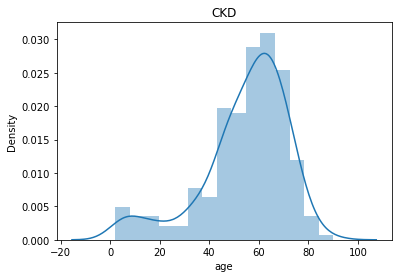

In [ ]:
# อายุของผู้ป่วย ckd
sns.distplot(df_ckd['age']).set(title='CKD')

### สรุปผล

*   ความผิดปกติของ  urine specific gravity (ค่าความถ่วงจำเพาะของปัสสาวะ) ที่น้อยกว่าปกติ มีแนวโน้มที่จะเป็นผู้ป่วย ckd
*   การตรวจพบ  Albumin (โปรตีนชนิดหนึ่ง), Pus Cell (PC), blood urea (bu, เม็ดเลือดแดง) ในปัสสาวะ เป็นหนึ่งในข้อบ่งชี้ถึงกลุ่มอาการ ckd
*   การตรวจพบค่า serum creatinine หรือ creatinine ในเลือด มากกว่า 1 เป็นหนึ่งในข้อบ่งชี้ถึงกลุ่มอาการ ckd
*   การตรวจพบค่า Hemoglobin ในเลือดน้อยกว่าปกติ เป็นหนึ่งในข้อบ่งชี้ถึงกลุ่มอาการ ckd
*   ภาวะความดันโลหิตสูงและเบาหวาน มีความเป็นไปได้ที่จะก่อให้เกิดโรค ckd ด้วย

*   ไม่จำเป็นต้องเป็นผู้ที่มีอายุมากเท่านั้นถึงจะเสี่ยงกับการเป็นโรคไตเรื้อรัง หรือ ckd อายุของผู้ป่วยมีการกระจายตัวเป็นช่วงกว้าง สามารถพบผู้ป่วย ckd ได้ตั้งแต่เกิด (อาจจะเกิดจากความผิดปกติทางพันธุกรรมหรืออื่นๆ) ผู้ป่วยส่วนมากจะมีอายุอยู่ในช่วง 50-60 ปี

**หมายเหตุ** การวิเคราะห์ข้อมูลทั้งหมดเป็นส่วนหนึ่งของการเรียน Data analytic เท่านั้น และเป็นการวิเคราะห์จากข้อมูลผู้ป่วยโดยใช้หลักสถิติ โดยผู้ที่ไม่ได้มีความเชี่ยงชาญในด้านวิทยาศาสตร์การแพทย์ ดังนั้น **ข้อมูลข้างต้นไม่สามารถนำไปใช้อ้างอิงในทางการแพทย์ได้**